In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Import the EEG Data from Subject Reading
url = '/Users/edmaryrosado/Work/neuroscience-ml-experiments/cognitive-load/kaggle-self-experiment/data/tiny_eeg_self_experiment_reading.csv'
data = pd.read_csv(url)

In [18]:
data.head()

,IndexId,Channel1,Channel2,Channel3,Channel4,Ref1,Ref2,Ref3,TS1,TS2
0,0,963.44,281.28,-71.98,-401.54,0.0,0.0,0.0,20:25:24,1.543200e+12
1,1,1011.33,353.28,-51.57,-379.71,0.0,0.0,0.0,20:25:24,1.543200e+12
2,2,979.95,321.36,-107.42,-440.38,0.0,0.0,0.0,20:25:24,1.543200e+12
3,3,934.42,262.01,-111.16,-441.09,0.0,0.0,0.0,20:25:24,1.543200e+12
4,4,996.12,306.95,-52.48,-386.58,0.0,0.0,0.0,20:25:24,1.543200e+12


In [19]:
# Remove IndexId, it's not important
newData = data.drop(columns = ['IndexId'], axis=1)
newData.head()

,Channel1,Channel2,Channel3,Channel4,Ref1,Ref2,Ref3,TS1,TS2
0,963.44,281.28,-71.98,-401.54,0.0,0.0,0.0,20:25:24,1.543200e+12
1,1011.33,353.28,-51.57,-379.71,0.0,0.0,0.0,20:25:24,1.543200e+12
2,979.95,321.36,-107.42,-440.38,0.0,0.0,0.0,20:25:24,1.543200e+12
3,934.42,262.01,-111.16,-441.09,0.0,0.0,0.0,20:25:24,1.543200e+12
4,996.12,306.95,-52.48,-386.58,0.0,0.0,0.0,20:25:24,1.543200e+12


Text(0.5, 1.0, 'Spike Detection While Reading')

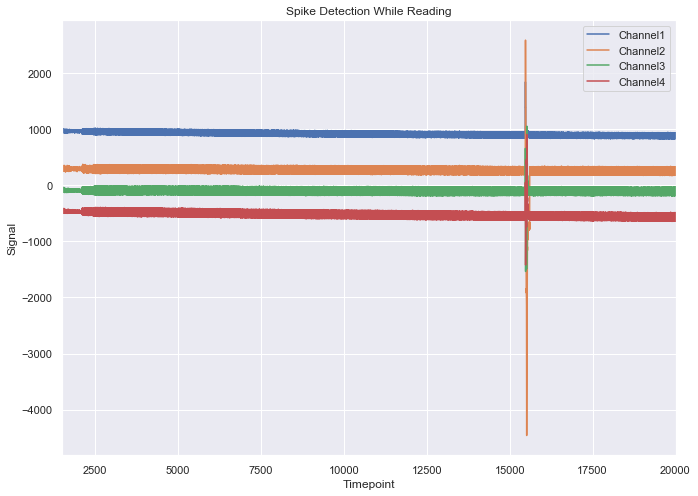

In [20]:
# At a glance, we have four channels, three separate references, and two timestamps, a human readable one and one that is ... not so much. 

# We can break up each channel and view their change as a function of time using the more readable timestamp as the label but TS2 as the Y value. Let's use Seaborn for our Timeseries data: https://seaborn.pydata.org/examples/errorband_lineplots.html

sns.set(rc={'figure.figsize':(11, 8)})
channels_plot = ['Channel1', 'Channel2', 'Channel3', 'Channel4']
ax = newData.loc['15000':'20000', channels_plot].plot()
ax.set_ylabel('Signal')
ax.set_xlabel('Timepoint')
ax.set_title('Spike Detection While Reading')
